In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Xtern/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

###We observe the data has 5000 samples with no null values that need to be filled.


In [5]:
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [7]:
#What values are continuous valued
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(continuous_columns)


Index(['Time'], dtype='object')


In [8]:
#What values are categorical
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_columns)

Index(['Year', 'Major', 'University', 'Order'], dtype='object')


###The values for time seem to be integers

In [9]:
#Data Summary
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


In [10]:
#Finding null values in each column
null_counts = df.isnull().sum()  # Count null values in each column
print(null_counts)


Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


#Exploratory Data Analysis
####It is evident that the data points consist year 2 and year 3 with very little data for year 1 and year 4. This may be due to several reasons ranging from students not preferring to eat outside in the early and late years due to either not trying new option or simply tired of eating the same food for years.
####We can also observe the majority of students are from STEM majors with afternoon being the peak time of sales.
####The university counts are skewed towards 4 major universities and rest 5 have less counts suggesting that foodX may not be popular in those universities.
####The distribution of time shows characteristics of a normal distribution suggesting the time when most students love to grab a meal.
####There is very little bias in the orders label which is good from classification point of view.
####There are quite a lot of business uses for the data, it is suggestive of the target demographic who love Food trucks. While there can be efforts made to attract the lesser represented groups like those in first and the last year, the data also suggests that there may be scope for improvement for food truck sales in universities with very less sales by understanding external factors that may be causing the less sales (eg: competitors, quality of food, location)



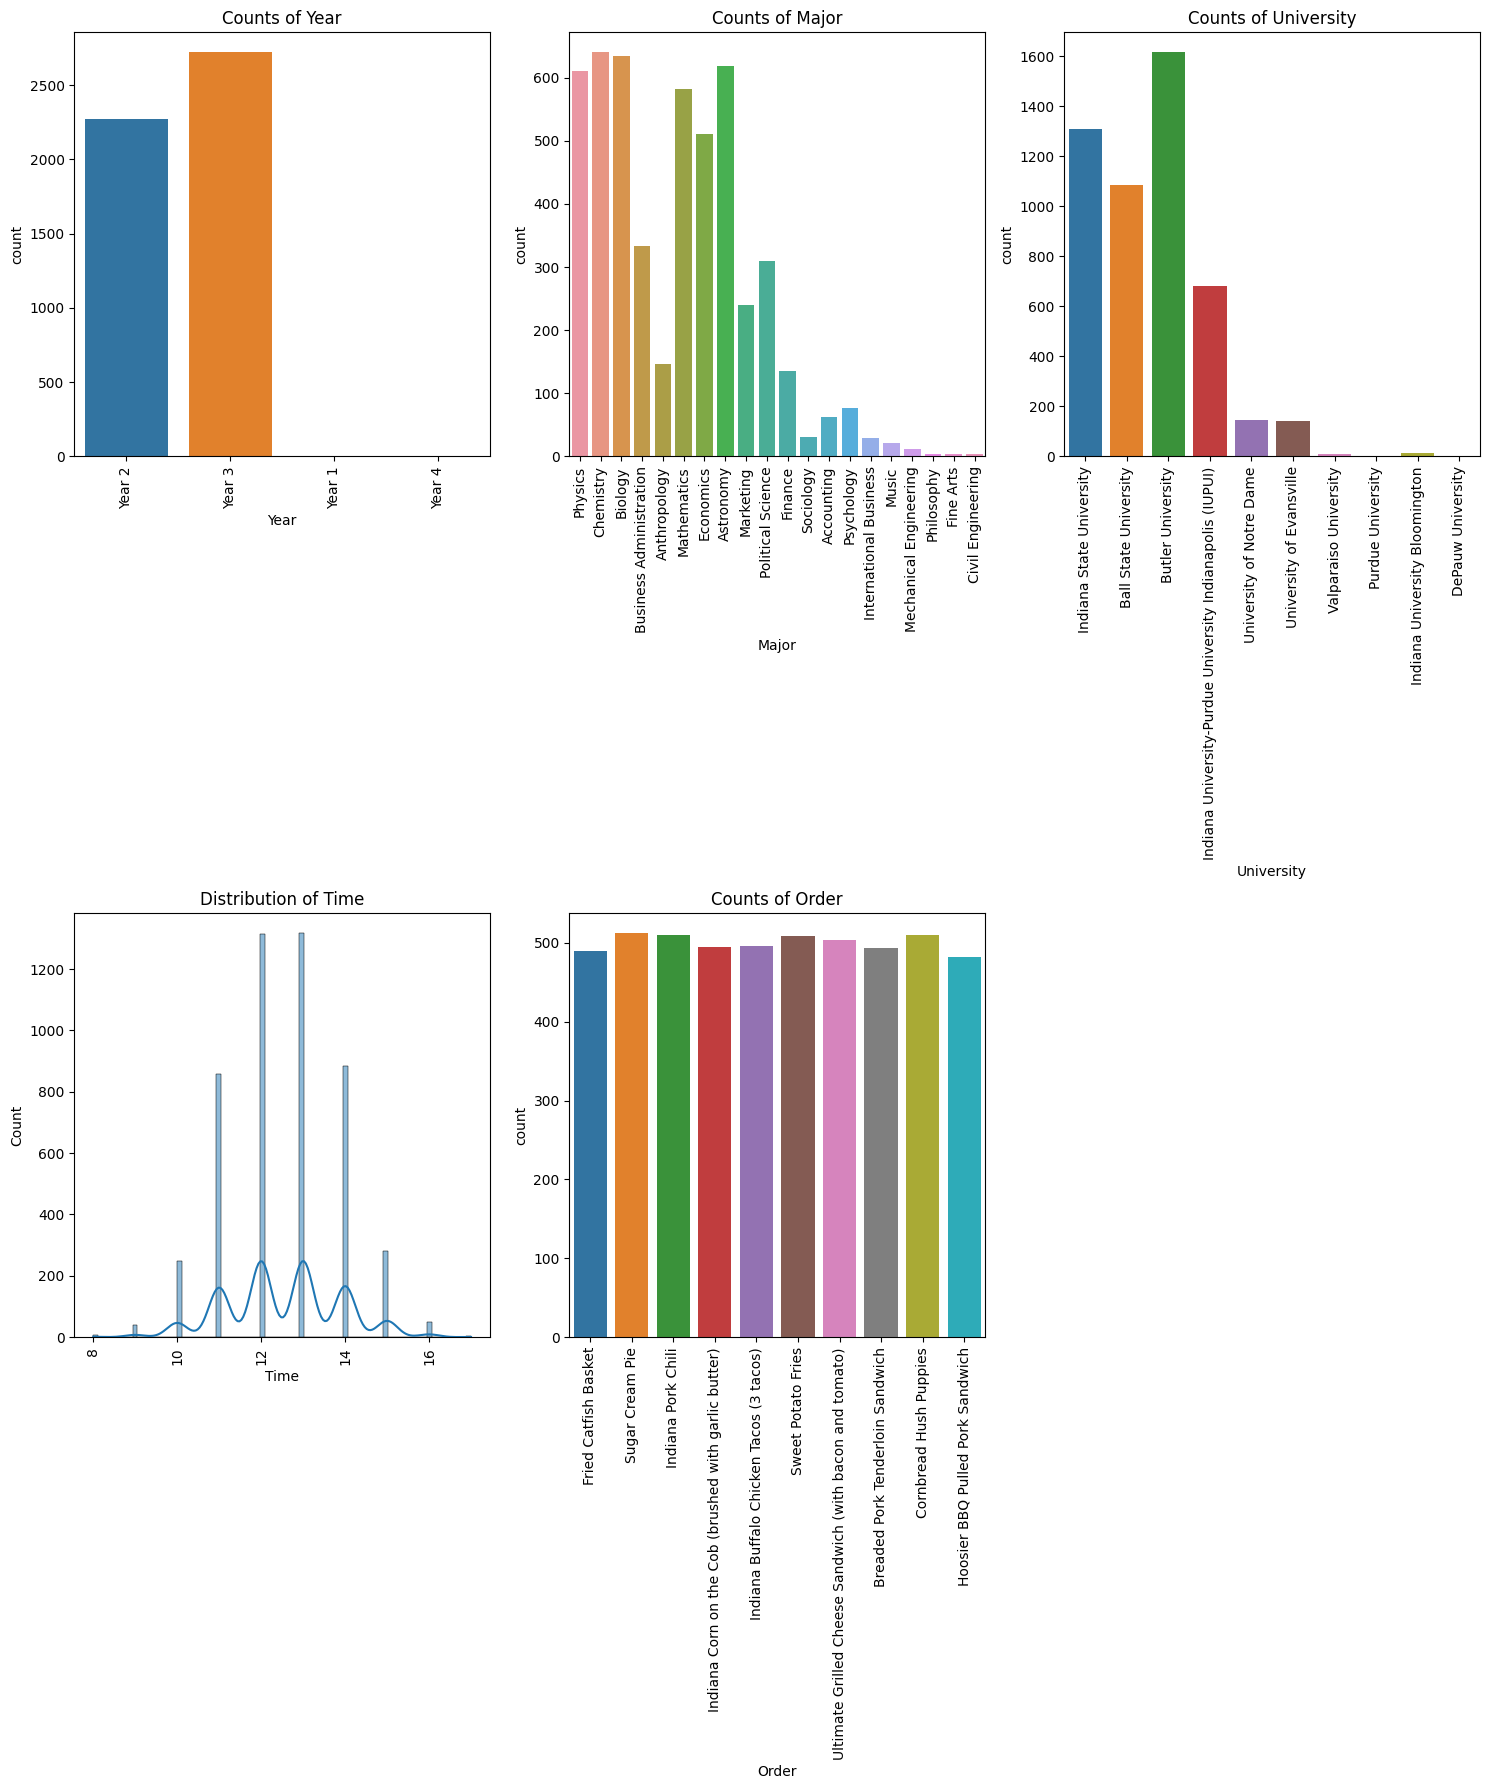

In [11]:
#generating histograms for all the columns as per the count
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 40))
for i, column in enumerate(df.columns):

    plt.subplot(5, 3, i + 1)
    if df[column].dtype in ['int64', 'float64']:  # Numeric columns
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
    else:  # Categorical columns
        sns.countplot(data=df, x=column)
        plt.title(f'Counts of {column}')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

#Ethical Implications
####Privacy Concerns: Collecting personal information about students' college experiences may raise privacy concerns. It's important to ensure that the data is collected and stored securely, and that students are informed about how their data will be used.

####Informed Consent: Ensure that students are aware that their data is being collected and used for order prediction, and obtain their explicit consent before collecting the data.

####Bias in Predictions: If there are biases in the data (e.g., if certain groups of students are over- or under-represented), the order predictions may also be biased. This could result in unfair treatment of certain groups of students.

#Business Outcome Implications
####Accurate order predictions can improve customer satisfaction and loyalty by providing a personalized and convenient ordering experience. Moreover, offering discounts for incorrect predictions can incentivize students to use the app, potentially increasing sales and revenue.

#Technical Implications
####The skewness in variables such as 'major', 'year', and 'university' could lead to inaccurate Pearson correlation coefficients, as this measure is sensitive to the distribution of the data. Moreover, the bias introduced by the skewness could adversely affect machine learning models, as the data is skewed towards the categories with the highest frequency.
####In addition, the skewness in these variables could result in model predictions that are not representative of the entire population. For example, the majority of data points are from a certain university or year, the model might perform well for that specific subset of data but may fail to generalize well to other universities or majors.



#Data Preprocessing
####Since there is no missing data we dont need to perform any data filling. All the features are categorical except 'Time', this however, has integer values with range from number of hours in the day. This can thus be also treated as a categorical variable.
####To convert the categorical variables into proper machine readable format we convert them into one hot encoded vectors and for the label we apply a label encoder as most machine learning models (like logistic regression, decision trees, random forests, SVMs, etc.) can handle integers as label without any problem
####We train a simple SVC on three different types of data preprocessing techniques to determine which encoding would be effective (Technically one hot and binary should give favourable results)
1.   Label Encoding
2.   One hot encoding
3.   Binary Encoding



In [12]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [17]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

le=preprocessing.LabelEncoder()
y = le.fit_transform(df.Order)
encodings=['label','binary','onehot']
for encoding in encodings:
  if encoding=='label':
    labelencoder = LabelEncoder()
    data = df.apply(labelencoder.fit_transform)
    data = data.drop("Order", axis=1)
  elif encoding=='binary':
    encoder = ce.BinaryEncoder(cols=['Year','University','Major','Time'])
    data = encoder.fit_transform(df)
    data = data.drop("Order", axis=1)
  elif encoding=='onehot':
    data = pd.get_dummies(df, columns=['Year','University','Major','Time'])
    data = data.drop("Order", axis=1)

  X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.20)
  model = SVC()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  train_score = model.score(X_train, y_train)
  print(f'Train score on {encoding} encoding: {train_score*100}')
  test_score = model.score(X_test, y_test)
  print(f'Test score of {encoding} encoding: {test_score*100}')


Train score on label encoding: 54.574999999999996
Test score of label encoding: 53.7
Train score on binary encoding: 66.875
Test score of binary encoding: 64.1
Train score on onehot encoding: 71.075
Test score of onehot encoding: 63.2


####One hot encoding gives the best results so we can continue with one hot encoding for the baseline model


<ipython-input-18-d7587bf7a120>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


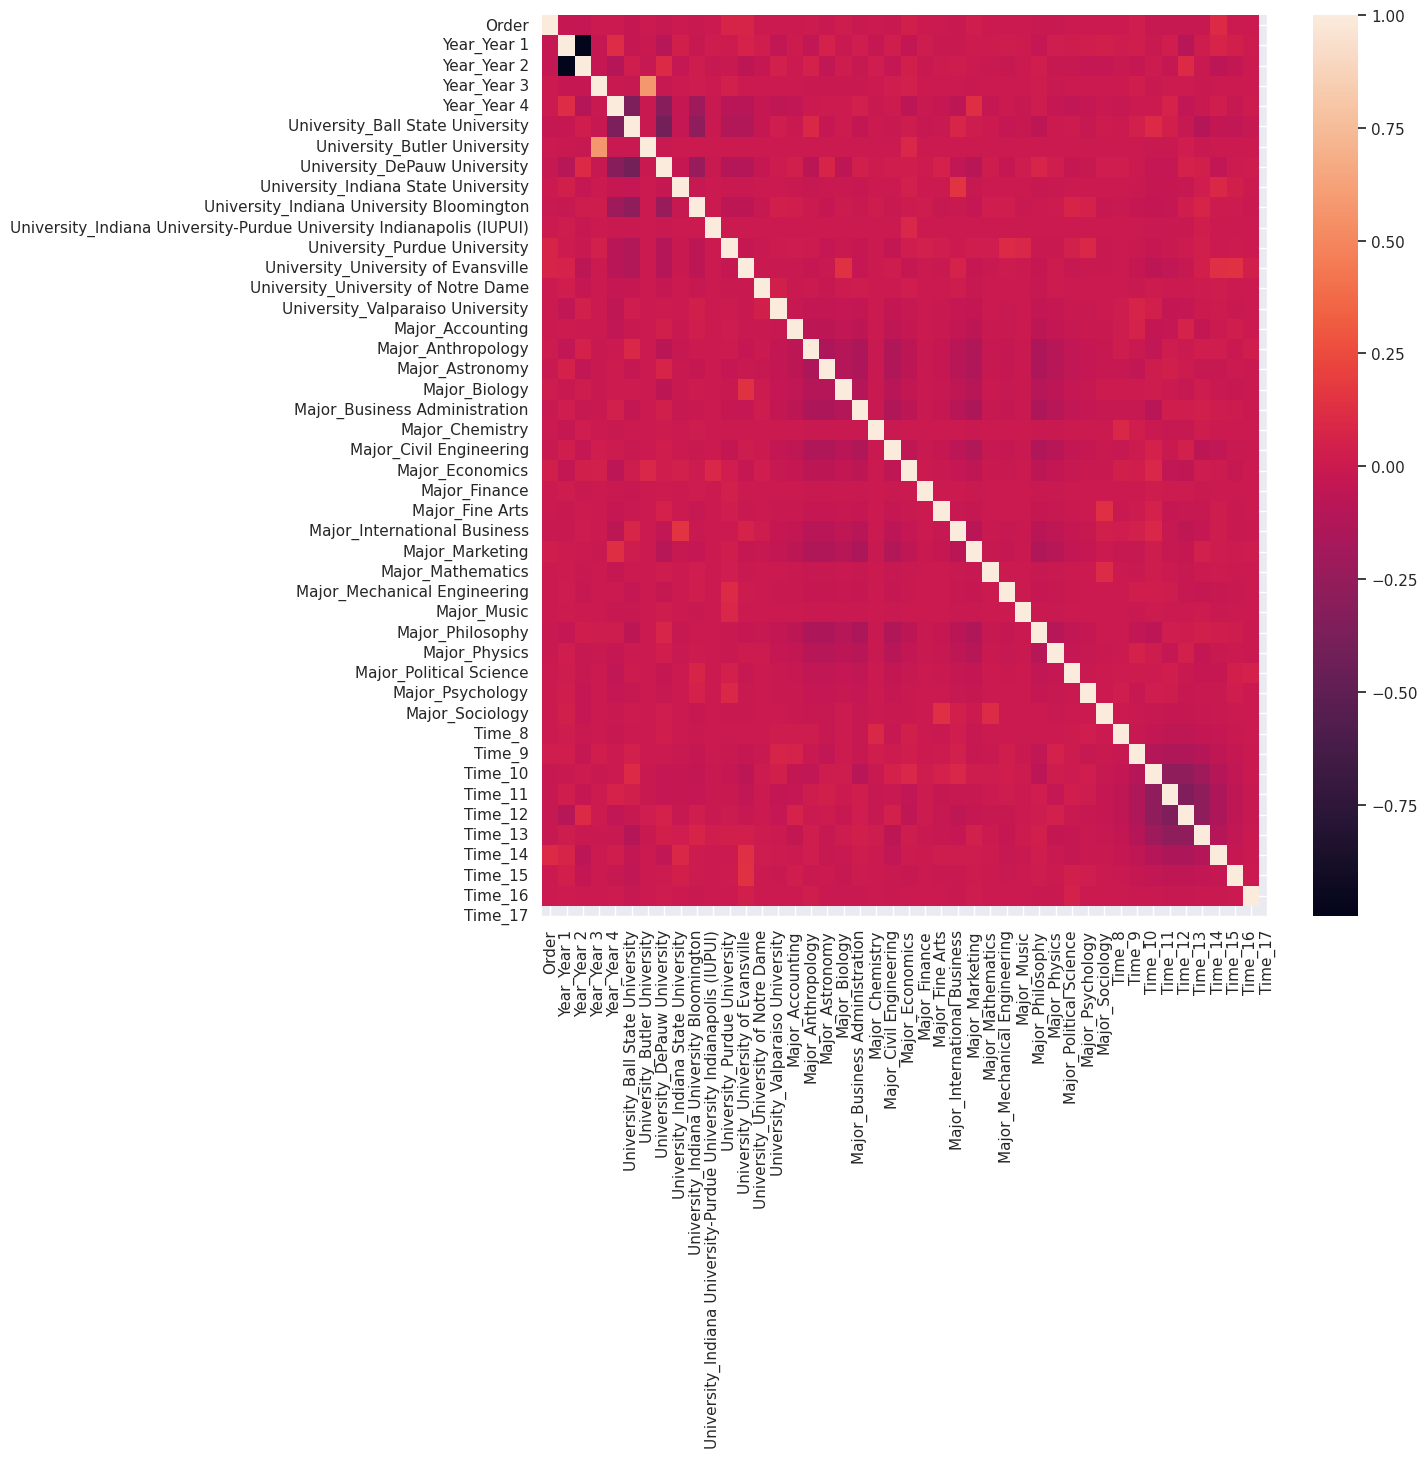

In [18]:
data = pd.get_dummies(df, columns=['Year','University','Major','Time'])
corr = data.corr()
sns.set(rc={'figure.figsize':(11.7,11.7)})
sns.heatmap(corr, xticklabels=data.columns.values, yticklabels=data.columns.values, annot=False)
plt.show()

In [21]:
data=data.drop('Order',axis=1)
X=data


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('XGBoost ', XGBClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Define the ensemble model
ensemble_model = ('Voting Classifier', VotingClassifier(estimators=base_models, voting='soft'))

# Add the ensemble model to the list of base models
models = base_models + [ensemble_model]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate the model

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print('-' * 50)


Model: Random Forest
Accuracy: 0.6430
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54        94
           1       0.55      0.59      0.57       112
           2       0.68      0.58      0.63       107
           3       0.68      0.65      0.66       103
           4       0.59      0.60      0.60        93
           5       0.70      0.85      0.76        84
           6       0.75      0.87      0.81        95
           7       0.61      0.57      0.59       110
           8       0.59      0.57      0.58        98
           9       0.64      0.73      0.68       104

    accuracy                           0.64      1000
   macro avg       0.64      0.65      0.64      1000
weighted avg       0.64      0.64      0.64      1000

--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.6400
Classification Report:
              precision    recall  f1-score   support

         

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6000
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.45      0.49        94
           1       0.57      0.54      0.55       112
           2       0.63      0.53      0.58       107
           3       0.63      0.57      0.60       103
           4       0.50      0.59      0.54        93
           5       0.60      0.81      0.69        84
           6       0.64      0.82      0.72        95
           7       0.64      0.72      0.68       110
           8       0.55      0.49      0.52        98
           9       0.68      0.52      0.59       104

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000

--------------------------------------------------
Model: XGBoost 
Accuracy: 0.6550
Classification Report:
              precision    recall  f1-score   support

           0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Voting Classifier
Accuracy: 0.6540
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        94
           1       0.63      0.59      0.61       112
           2       0.74      0.60      0.66       107
           3       0.63      0.64      0.64       103
           4       0.63      0.57      0.60        93
           5       0.62      0.85      0.72        84
           6       0.70      0.91      0.79        95
           7       0.62      0.62      0.62       110
           8       0.63      0.55      0.59        98
           9       0.68      0.76      0.72       104

    accuracy                           0.65      1000
   macro avg       0.65      0.66      0.65      1000
weighted avg       0.65      0.65      0.65      1000

--------------------------------------------------


#Of all the classifiers tested we get the best result with XGBoost, lets get to hyperparameter tuning to further optimize the model

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# data = pd.read_csv('your_dataset.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb = XGBClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)
y_train_pred = grid_search.best_estimator_.predict(X_train)
# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Train Accuracy: 0.71575
Test Accuracy: 0.653
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.49      0.54        94
           1       0.61      0.58      0.59       112
           2       0.77      0.61      0.68       107
           3       0.65      0.64      0.65       103
           4       0.58      0.61      0.60        93
           5       0.64      0.83      0.72        84
           6       0.76      0.87      0.81        95
           7       0.62      0.62      0.62       110
           8       0.59      0.59      0.59        98
           9       0.70      0.72      0.71       104

    accuracy                           0.65      1000
   macro avg       0.65      0.66      0.65      1000
weighted avg       0.65      0.65      0.65      1000



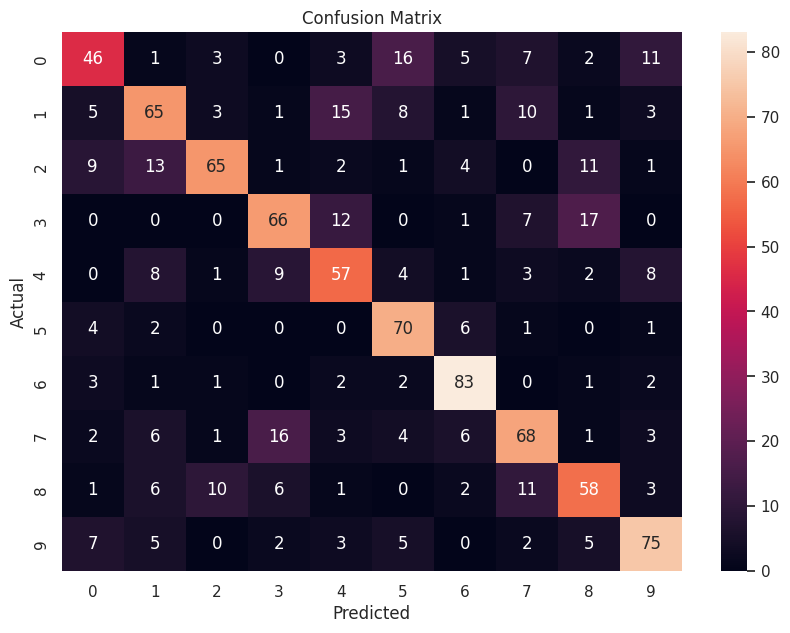

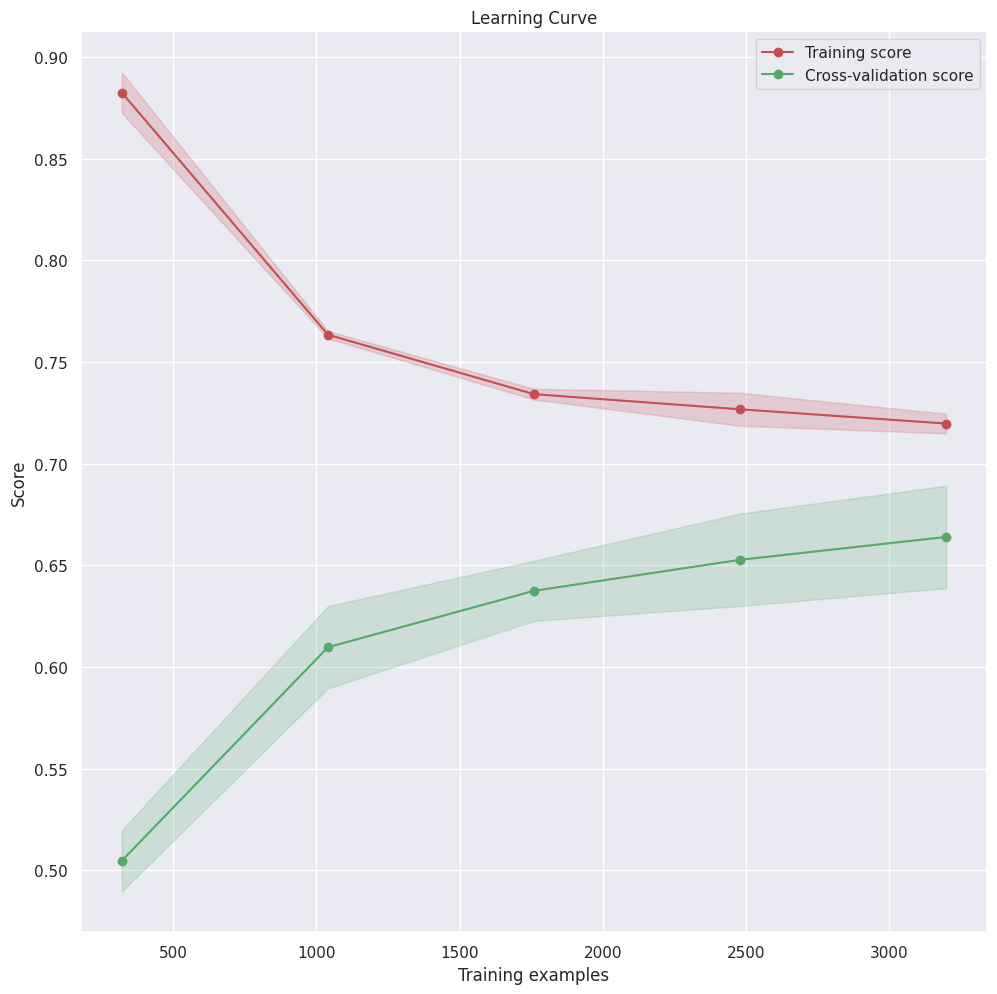

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5)

# Calculate the average and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


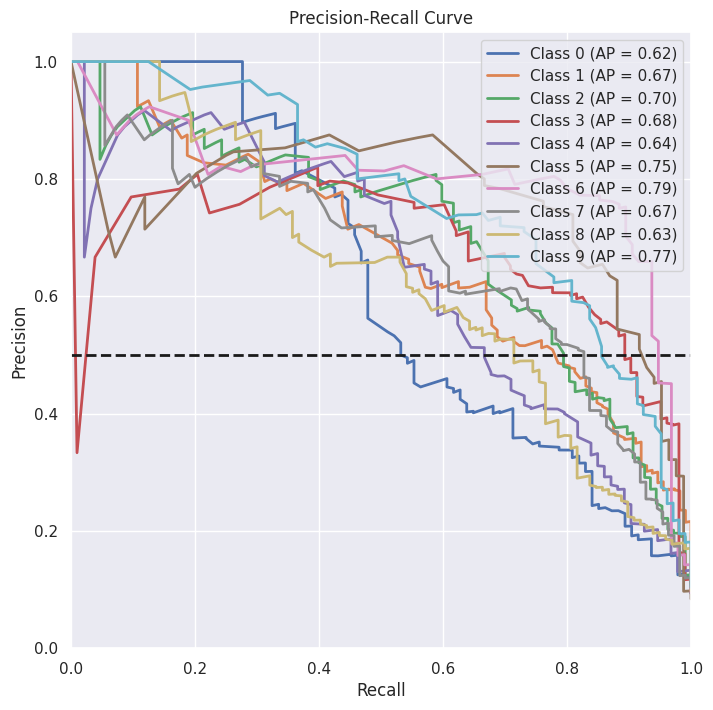

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
num_classes=10
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[*range(num_classes)])
y_scores_bin = grid_search.best_estimator_.predict_proba(X_test)

# Compute precision-recall curve and average precision score for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores_bin[:, i])

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:0.2f})')
plt.plot([0, 1], [0.5, 0.5], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


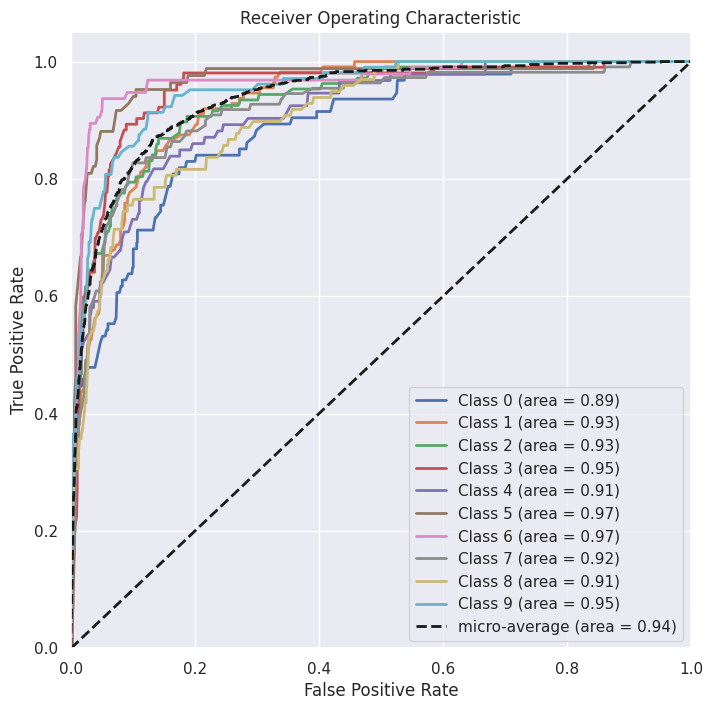

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
num_classes=10
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[*range(num_classes)])
y_scores_bin = grid_search.best_estimator_.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot(fpr["micro"], tpr["micro"], 'k--', lw=2, label=f'micro-average (area = {roc_auc["micro"]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#Saving the best model

In [25]:
import joblib
joblib.dump(grid_search.best_estimator_, 'model.pkl')

['model.pkl']

#Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?

###Looking at the model and its results there are several considerations need to be addressed. The performance metrics, including accuracy, precision, recall, and F1 score, need to be evaluated to ensure they meet the required standards. It's also crucial to check for overfitting by comparing the performance metrics of the training and testing datasets. Additionally, the scalability of the solution must be assessed to ensure it can handle current and future data volumes, includng training time, prediction time, and memory usage.
###Furthermore, legal and ethical implications, especially in terms of bias that we discussed earlier, must be carefully evaluated. Finally, the business impact of the model should be assessed to ensure that, despite good performance metrics, it significantly contributes to increase in sales for FoodX.
###This is the best course of action if FoodX needs to be deployed in a real world scenario